In [20]:
import seaborn as sns
import pandas as pd
sns.set(font_scale=1.5)
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline

In [21]:
# set numpy random seed so that this notebook is deterministic
np.random.seed(23)

## Linear Classification

In [22]:
iris_data = pd.read_csv("iris.csv")
iris_data.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
139,6.9,3.1,5.4,2.1,virginica
125,7.2,3.2,6.0,1.8,virginica
67,5.8,2.7,4.1,1.0,versicolor
3,4.6,3.1,1.5,0.2,setosa
113,5.7,2.5,5.0,2.0,virginica


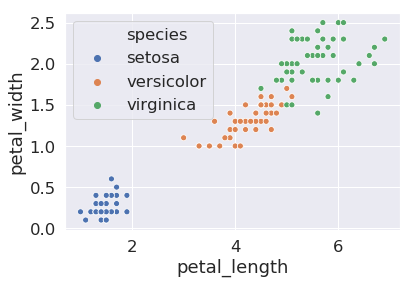

In [23]:
sns.scatterplot(data = iris_data, x = "petal_length", y="petal_width", hue="species")
#fig = plt.gcf()
#fig.savefig("iris_scatter_plot_with_petal_data.png", dpi=300, bbox_inches = "tight")

In [24]:
from sklearn.linear_model import LogisticRegression
logistic_regression_model = LogisticRegression(multi_class = 'ovr')
logistic_regression_model = logistic_regression_model.fit(iris_data[["petal_length", "petal_width"]], iris_data["species"])

/home/hug/miniconda3/envs/data100/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


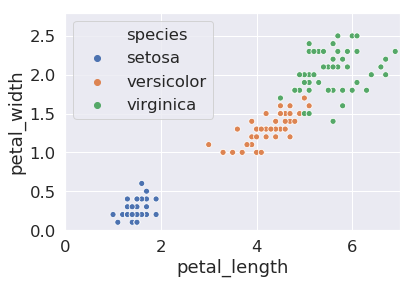

In [25]:
from matplotlib.colors import ListedColormap
sns_cmap = ListedColormap(np.array(sns.color_palette())[0:3, :])

xx, yy = np.meshgrid(np.arange(0, 7, 0.02),
                     np.arange(0, 2.8, 0.02))

Z_string = logistic_regression_model.predict(np.c_[xx.ravel(), yy.ravel()])
categories, Z_int = np.unique(Z_string, return_inverse=True)
Z_int = Z_int 
Z_int = Z_int.reshape(xx.shape)
#cs = plt.contourf(xx, yy, Z_int, cmap=sns_cmap)
sns.scatterplot(data = iris_data, x = "petal_length", y="petal_width", hue="species")
plt.xlim(0, 7);
plt.ylim(0, 2.8);
plt.savefig("iris_decision_boundaries_logistic_regression_no_boundaries.png", dpi=300, bbox_inches = "tight")

## Decision Tree Classification

In [26]:
from sklearn import tree
decision_tree_model = tree.DecisionTreeClassifier()
decision_tree_model = decision_tree_model.fit(iris_data[["petal_length", "petal_width"]], iris_data["species"])

In [27]:
four_random_rows = iris_data.sample(4)
four_random_rows

,sepal_length,sepal_width,petal_length,petal_width,species
148,6.2,3.4,5.4,2.3,virginica
113,5.7,2.5,5.0,2.0,virginica
14,5.8,4.0,1.2,0.2,setosa
34,4.9,3.1,1.5,0.1,setosa


In [28]:
decision_tree_model.predict(four_random_rows[["petal_length", "petal_width"]])

array(['virginica', 'virginica', 'setosa', 'setosa'], dtype=object)

[Text(173.4,210.32,'X[0] <= 2.45\nentropy = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(141.873,172.08,'entropy = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(204.927,172.08,'X[1] <= 1.75\nentropy = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(126.109,133.84,'X[0] <= 4.95\nentropy = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(63.0545,95.6,'X[1] <= 1.65\nentropy = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(31.5273,57.36,'entropy = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(94.5818,57.36,'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(189.164,95.6,'X[1] <= 1.55\nentropy = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(157.636,57.36,'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(220.691,57.36,'X[0] <= 5.45\nentropy = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(189.164,19.12,'entropy = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(252.218,19.12,'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(283.745,133.84,'X[0] <= 4.85\nentropy = 0.0

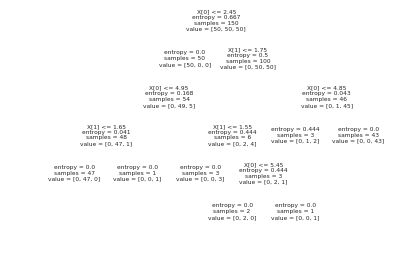

In [29]:
 tree.plot_tree(decision_tree_model) 

In [30]:
import graphviz 

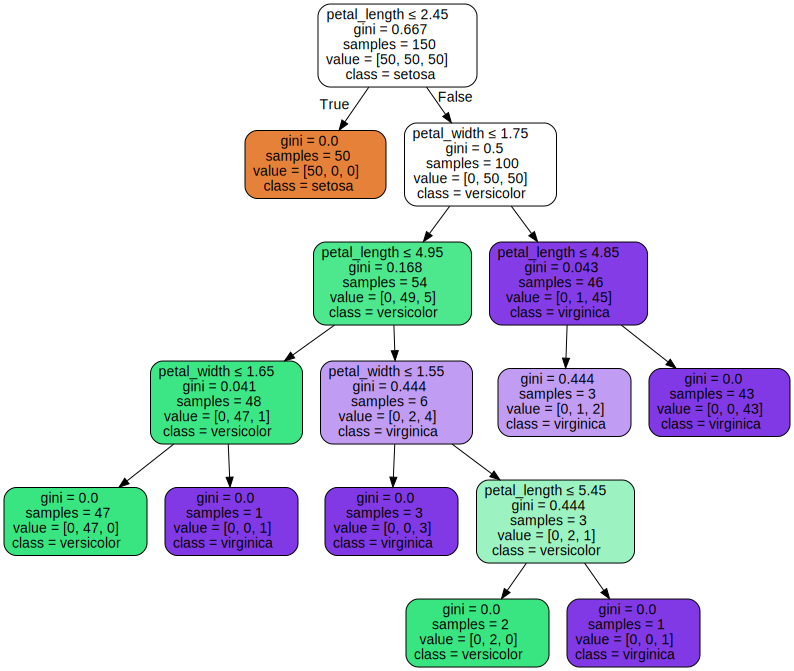

In [31]:
import graphviz
dot_data = tree.export_graphviz(decision_tree_model, out_file=None, 
                      feature_names=["petal_length", "petal_width"],  
                      class_names=["setosa", "versicolor", "virginica"],  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)
#graph.render(format="png", filename="iris_tree")
graph

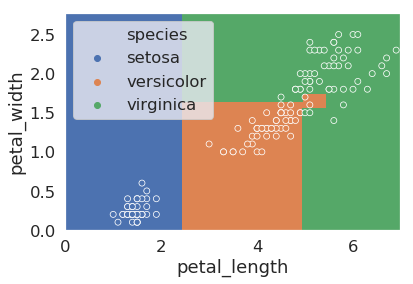

In [32]:
from matplotlib.colors import ListedColormap
sns_cmap = ListedColormap(np.array(sns.color_palette())[0:3, :])

xx, yy = np.meshgrid(np.arange(0, 7, 0.02),
                     np.arange(0, 2.8, 0.02))

Z_string = decision_tree_model.predict(np.c_[xx.ravel(), yy.ravel()])
categories, Z_int = np.unique(Z_string, return_inverse=True)
Z_int = Z_int 
Z_int = Z_int.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z_int, cmap=sns_cmap)
sns.scatterplot(data = iris_data, x = "petal_length", y="petal_width", hue="species")
#fig = plt.gcf()
#fig.savefig("iris_decision_boundaries.png", dpi=300, bbox_inches = "tight")

In [33]:
from sklearn.metrics import accuracy_score
predictions = decision_tree_model.predict(iris_data[["petal_length", "petal_width"]])
accuracy_score(predictions, iris_data["species"])

0.9933333333333333

In [34]:
iris_data.query("petal_length > 2.45 and petal_width > 1.75 and petal_length <= 4.85")

,sepal_length,sepal_width,petal_length,petal_width,species
70,5.9,3.2,4.8,1.8,versicolor
126,6.2,2.8,4.8,1.8,virginica
138,6.0,3.0,4.8,1.8,virginica


## Overfitting

In [35]:
train_iris_data, test_iris_data = np.split(iris_data.sample(frac=1), [110])

In [36]:
#sort so that the color labels match what we had in the earlier part of lecture
train_iris_data = train_iris_data.sort_values(by="species")
test_iris_data = test_iris_data.sort_values(by="species")

In [37]:
len(train_iris_data)

110

In [38]:
train_iris_data.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
46,5.1,3.8,1.6,0.2,setosa
15,5.7,4.4,1.5,0.4,setosa
34,4.9,3.1,1.5,0.1,setosa
24,4.8,3.4,1.9,0.2,setosa
37,4.9,3.1,1.5,0.1,setosa


In [39]:
from sklearn import tree
decision_tree_model = tree.DecisionTreeClassifier()
decision_tree_model = decision_tree_model.fit(train_iris_data[["petal_length", "petal_width"]], train_iris_data["species"])

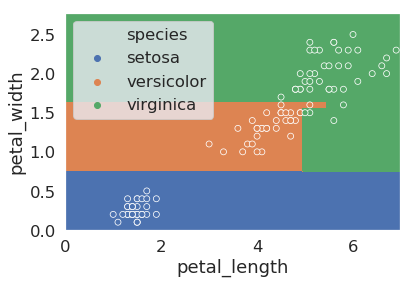

In [40]:
from matplotlib.colors import ListedColormap
sns_cmap = ListedColormap(np.array(sns.color_palette())[0:3, :])

xx, yy = np.meshgrid(np.arange(0, 7, 0.02),
                     np.arange(0, 2.8, 0.02))

Z_string = decision_tree_model.predict(np.c_[xx.ravel(), yy.ravel()])
categories, Z_int = np.unique(Z_string, return_inverse=True)
Z_int = Z_int 
Z_int = Z_int.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z_int, cmap=sns_cmap)
sns.scatterplot(data = train_iris_data, x = "petal_length", y="petal_width", hue="species")
#fig = plt.gcf()
#fig.savefig("iris_decision_boundaries_model_train_test_split_training_only.png", dpi=300, bbox_inches = "tight")

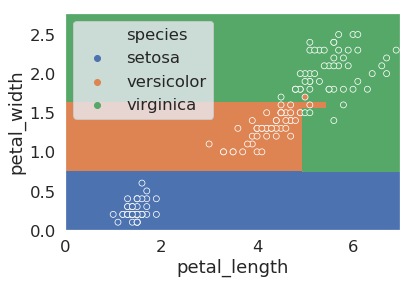

In [41]:
from matplotlib.colors import ListedColormap
sns_cmap = ListedColormap(np.array(sns.color_palette())[0:3, :])

xx, yy = np.meshgrid(np.arange(0, 7, 0.02),
                     np.arange(0, 2.8, 0.02))

Z_string = decision_tree_model.predict(np.c_[xx.ravel(), yy.ravel()])
categories, Z_int = np.unique(Z_string, return_inverse=True)
Z_int = Z_int 
Z_int = Z_int.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z_int, cmap=sns_cmap)
sns.scatterplot(data = iris_data, x = "petal_length", y="petal_width", hue="species")
#fig = plt.gcf()
#fig.savefig("iris_decision_boundaries_model_train_test_split.png", dpi=300, bbox_inches = "tight")

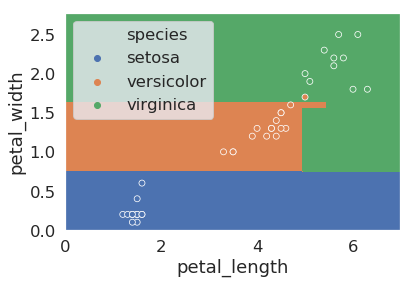

In [42]:
from matplotlib.colors import ListedColormap
sns_cmap = ListedColormap(np.array(sns.color_palette())[0:3, :])

xx, yy = np.meshgrid(np.arange(0, 7, 0.02),
                     np.arange(0, 2.8, 0.02))

Z_string = decision_tree_model.predict(np.c_[xx.ravel(), yy.ravel()])
categories, Z_int = np.unique(Z_string, return_inverse=True)
Z_int = Z_int 
Z_int = Z_int.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z_int, cmap=sns_cmap)
sns.scatterplot(data = test_iris_data, x = "petal_length", y="petal_width", hue="species")
#fig = plt.gcf()
#fig.savefig("iris_decision_boundaries_model_train_test_split_test_only.png", dpi=300, bbox_inches = "tight")

In [43]:
accuracy_score(decision_tree_model.predict(train_iris_data[["petal_length", "petal_width"]]), train_iris_data["species"])

0.990909090909091

In [44]:
predictions = decision_tree_model.predict(test_iris_data[["petal_length", "petal_width"]])
accuracy_score(predictions, test_iris_data["species"])

0.975

In [45]:
from sklearn import tree
sepal_decision_tree_model = tree.DecisionTreeClassifier()
sepal_decision_tree_model = decision_tree_model.fit(train_iris_data[["sepal_length", "sepal_width"]], train_iris_data["species"])

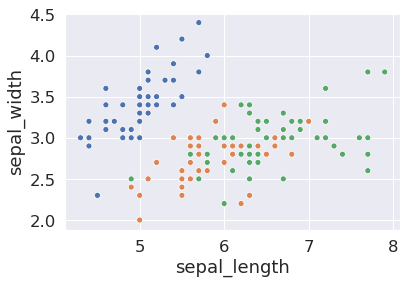

In [46]:
sns.scatterplot(data = iris_data, x = "sepal_length", y="sepal_width", hue="species", legend=False)
fig = plt.gcf()
fig.savefig("iris_scatter_plot_with_petal_data_sepal_only.png", dpi=300, bbox_inches = "tight")

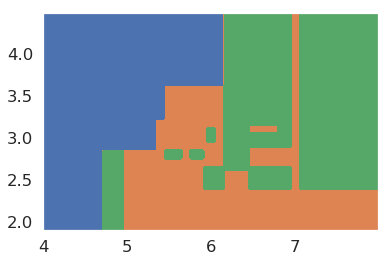

In [47]:
from matplotlib.colors import ListedColormap
sns_cmap = ListedColormap(np.array(sns.color_palette())[0:3, :])

xx, yy = np.meshgrid(np.arange(4, 8, 0.02),
                     np.arange(1.9, 4.5, 0.02))

Z_string = sepal_decision_tree_model.predict(np.c_[xx.ravel(), yy.ravel()])
categories, Z_int = np.unique(Z_string, return_inverse=True)
Z_int = Z_int 
Z_int = Z_int.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z_int, cmap=sns_cmap)
fig = plt.gcf()
fig.savefig("iris_sepal_decision_boundaries_no_data.png", dpi=300, bbox_inches = "tight")

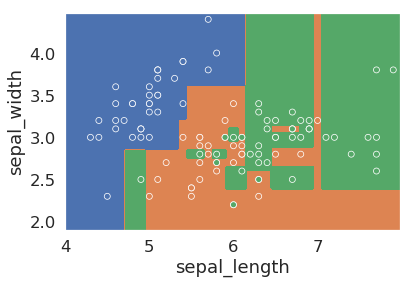

In [48]:
from matplotlib.colors import ListedColormap
sns_cmap = ListedColormap(np.array(sns.color_palette())[0:3, :])

xx, yy = np.meshgrid(np.arange(4, 8, 0.02),
                     np.arange(1.9, 4.5, 0.02))

Z_string = sepal_decision_tree_model.predict(np.c_[xx.ravel(), yy.ravel()])
categories, Z_int = np.unique(Z_string, return_inverse=True)
Z_int = Z_int 
Z_int = Z_int.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z_int, cmap=sns_cmap)
sns.scatterplot(data = train_iris_data, x = "sepal_length", y="sepal_width", hue="species", legend=False)
fig = plt.gcf()
fig.savefig("iris_sepal_decision_boundaries_model_training_only.png", dpi=300, bbox_inches = "tight")

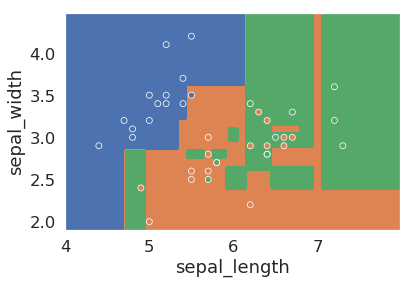

In [49]:
from matplotlib.colors import ListedColormap
sns_cmap = ListedColormap(np.array(sns.color_palette())[0:3, :])

xx, yy = np.meshgrid(np.arange(4, 8, 0.02),
                     np.arange(1.9, 4.5, 0.02))

Z_string = sepal_decision_tree_model.predict(np.c_[xx.ravel(), yy.ravel()])
categories, Z_int = np.unique(Z_string, return_inverse=True)
Z_int = Z_int 
Z_int = Z_int.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z_int, cmap=sns_cmap)
sns.scatterplot(data = test_iris_data, x = "sepal_length", y="sepal_width", hue="species", legend=False)
fig = plt.gcf()
fig.savefig("iris_sepal_decision_boundaries_model_test_only.png", dpi=300, bbox_inches = "tight")
#fig = plt.gcf()
#fig.savefig("iris_decision_boundaries_model_train_test_split.png", dpi=300, bbox_inches = "tight")

In [50]:
dot_data = tree.export_graphviz(sepal_decision_tree_model, out_file=None, 
                      feature_names=["sepal_length", "sepal_width"],  
                      class_names=["setosa", "versicolor", "virginica"],  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)
graph.render(format="png", filename="sepal_tree")
#graph

'sepal_tree.png'

In [51]:
accuracy_score(sepal_decision_tree_model.predict(train_iris_data[["sepal_length", "sepal_width"]]), train_iris_data["species"])

0.9363636363636364

In [52]:
accuracy_score(sepal_decision_tree_model.predict(test_iris_data[["sepal_length", "sepal_width"]]), test_iris_data["species"])

0.725

In [53]:
decision_tree_model_4d = tree.DecisionTreeClassifier()
decision_tree_model_4d = decision_tree_model_4d.fit(train_iris_data[["petal_length", "petal_width", 
                                                                     "sepal_length", "sepal_width"]], train_iris_data["species"])

In [54]:
predictions = decision_tree_model_4d.predict(train_iris_data[["petal_length", "petal_width", "sepal_length", "sepal_width"]])
accuracy_score(predictions, train_iris_data["species"])

1.0

In [55]:
predictions = decision_tree_model_4d.predict(test_iris_data[["petal_length", "petal_width", "sepal_length", "sepal_width"]])
accuracy_score(predictions, test_iris_data["species"])

0.975

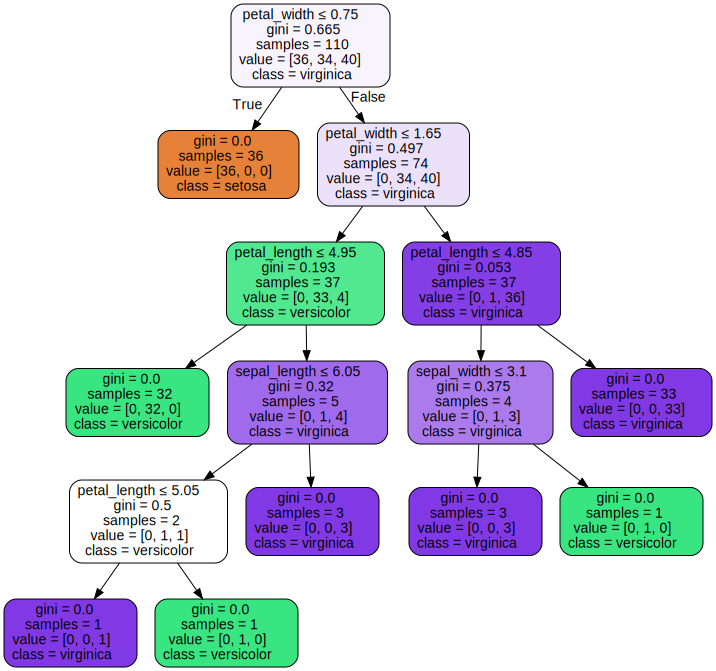

In [56]:
dot_data = tree.export_graphviz(decision_tree_model_4d, out_file=None, 
                      feature_names=["petal_length", "petal_width", "sepal_length", "sepal_width"],  
                      class_names=["setosa", "versicolor", "virginica"],  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)
graph

In [57]:
graph.render(format="png", filename="iris_4d_tree")

'iris_4d_tree.png'

### Creating Decision Trees

In [58]:
def entropy(x):
    normalized_x = x / np.sum(x)
    return sum(-normalized_x * np.log2(normalized_x))

In [59]:
-np.log2(0.33)*0.33

0.5278224832373695

In [60]:
-np.log2(0.36)*0.36

0.5306152277996684

In [61]:
entropy([34, 36, 40])

1.581649163979848

In [62]:
entropy([149, 1, 1])

0.11485434496175385

In [63]:
entropy([50, 50])

1.0

In [64]:
entropy([50, 50, 50])

1.584962500721156

In [65]:
entropy([31, 4, 1])

0.6815892897202809

In [66]:
#entropy([50, 46, 3])
#entropy([4, 47])
#entropy([41, 50])
#entropy([50, 50])

In [67]:
def weighted_average_entropy(x1, x2):
    N1 = sum(x1)
    N2 = sum(x2)
    N = N1/(N1 + N2)
    return (N1 * entropy(x1) + N2 * entropy(x2)) / (N1 + N2)

In [68]:
weighted_average_entropy([50, 46, 3], [4, 47])

0.9033518322003758

In [69]:
weighted_average_entropy([50, 9], [41, 50])

0.8447378399375686

In [70]:
weighted_average_entropy([2, 50, 50], [48])

0.761345106024134

In [71]:
weighted_average_entropy([50, 50], [50])

0.6666666666666666

### Random Forests

In [103]:
ten_decision_tree_models = []
ten_training_sets = []
for i in range(10):
    current_model = tree.DecisionTreeClassifier()
    temp_iris_training_data, temp_iris_test_data = np.split(iris_data.sample(frac=1), [110])
    temp_iris_training_data = temp_iris_training_data.sort_values("species")
    current_model.fit(temp_iris_training_data[["sepal_length", "sepal_width"]], temp_iris_training_data["species"])
    ten_decision_tree_models.append(current_model)
    ten_training_sets.append(temp_iris_training_data)

In [156]:
def plot_decision_tree(decision_tree_model, data = None, disable_axes = False):
    from matplotlib.colors import ListedColormap
    sns_cmap = ListedColormap(np.array(sns.color_palette())[0:3, :])

    xx, yy = np.meshgrid(np.arange(4, 8, 0.02),
                     np.arange(1.9, 4.5, 0.02))

    Z_string = decision_tree_model.predict(np.c_[xx.ravel(), yy.ravel()])
    categories, Z_int = np.unique(Z_string, return_inverse=True)
    Z_int = Z_int.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z_int, cmap=sns_cmap)
    if data is not None:
        sns.scatterplot(data = data, x = "sepal_length", y="sepal_width", hue="species", legend=False)

    if disable_axes:
        plt.axis("off")
#    if disable_axes:
#        
#        plt.gca().xaxis.label.set_visible(False)
#        plt.gca().yaxis.label.set_visible(False)        

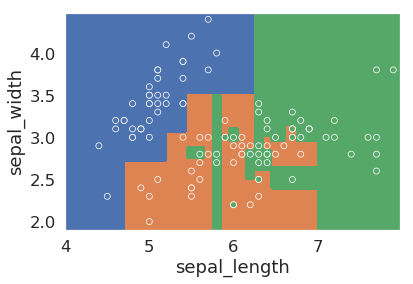

In [142]:
m_num = 0
plot_decision_tree(ten_decision_tree_models[m_num], ten_training_sets[m_num])
plt.savefig("random_forest_model_1_example.png", dpi = 300, bbox_inches = "tight")

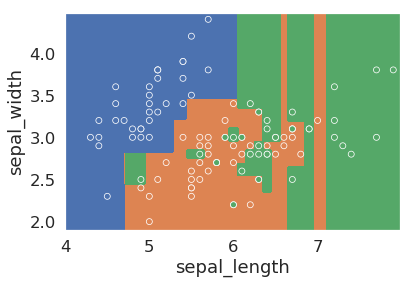

In [143]:
m_num = 7
plot_decision_tree(ten_decision_tree_models[m_num], ten_training_sets[m_num])
plt.savefig("random_forest_model_2_example.png", dpi = 300, bbox_inches = "tight")

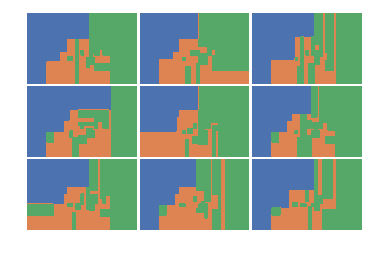

In [160]:
import matplotlib.gridspec as gridspec
gs1 = gridspec.GridSpec(3, 3)
gs1.update(wspace=0.025, hspace=0.025) # set the spacing between axes. 

for i in range(0, 9):
    plt.subplot(gs1[i]) #3, 3, i)
    plot_decision_tree(ten_decision_tree_models[i], None, True)    
    
plt.savefig("random_forest_model_9_examples.png", dpi = 300, bbox_inches = "tight")    